In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(file_path)

print("5 baris pertama dataset:")
print(df.head())

Mounted at /content/drive
5 baris pertama dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSuppo

In [17]:
print("\nInformasi Dataset:")
df.info()

print("\nStatistik Deskriptif:")
print(df.describe())

print("\nJumlah nilai unik per kolom:")
print(df.nunique())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("\nJumlah nilai NaN di TotalCharges setelah konversi:")
print(df['TotalCharges'].isnull().sum())

df.dropna(subset=['TotalCharges'], inplace=True)

print("\nJumlah nilai NaN di TotalCharges setelah dropna:")
print(df['TotalCharges'].isnull().sum())

print("\nInformasi Dataset setelah penanganan TotalCharges:")
df.info()


Jumlah nilai NaN di TotalCharges setelah konversi:
11

Jumlah nilai NaN di TotalCharges setelah dropna:
0

Informasi Dataset setelah penanganan TotalCharges:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-nu

In [19]:
df.drop('customerID', axis=1, inplace=True)
print("\nInformasi Dataset setelah menghapus customerID:")
df.info()

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

for col in binary_cols:
    # Untuk 'gender', asumsikan 'Female' adalah 1 dan 'Male' adalah 0
    if col == 'gender':
        df[col] = df[col].map({'Female': 1, 'Male': 0})
    # Untuk kolom lain, 'Yes' adalah 1 dan 'No' adalah 0
    elif col == 'Churn': # Kolom target
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    else: # Kolom biner lainnya
        df[col] = df[col].map({'Yes': 1, 'No': 0})

print("\n5 baris pertama setelah konversi kolom biner:")
print(df.head())

categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
print("\nInformasi Dataset setelah One-Hot Encoding:")
df.info()

print("\n5 baris pertama dataset setelah semua pra-pemrosesan:")
print(df.head())


Informasi Dataset setelah menghapus customerID:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16


Distribusi Variabel Target 'Churn':
Churn
0    5163
1    1869
Name: count, dtype: int64
Persentase Churn: 26.58%
Persentase Non-Churn: 73.42%


/tmp/ipython-input-446590086.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


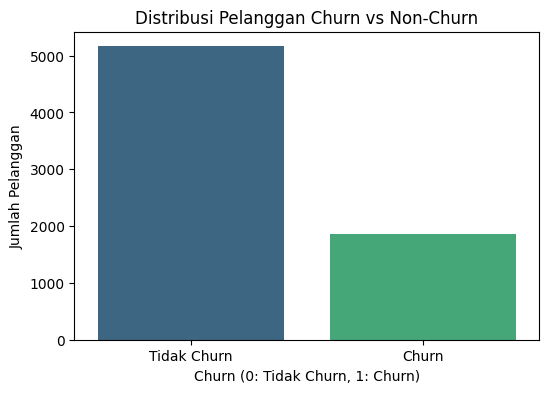

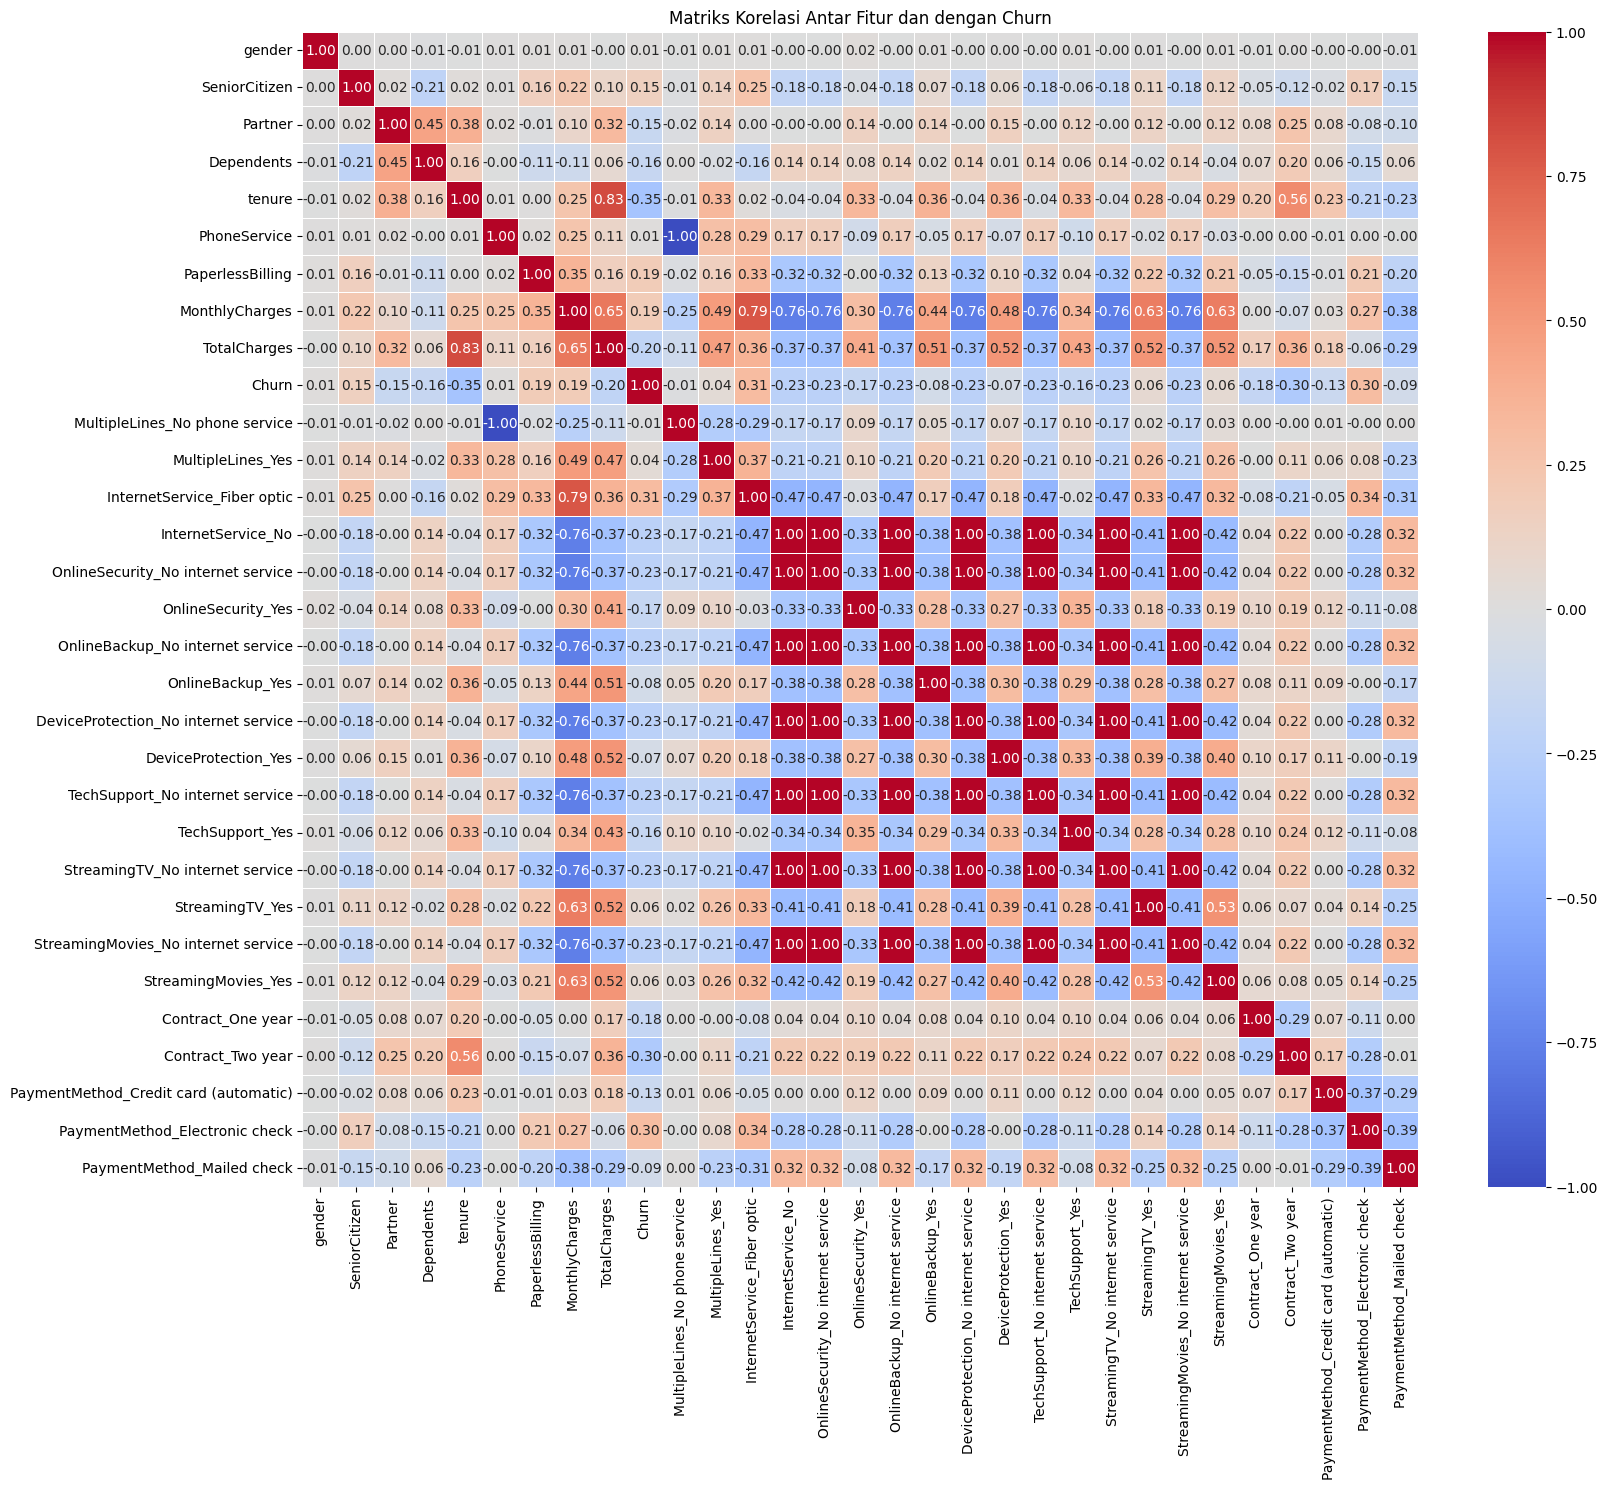


10 Korelasi Teratas dengan 'Churn':
Churn                             1.000000
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
MonthlyCharges                    0.192858
PaperlessBilling                  0.191454
SeniorCitizen                     0.150541
StreamingTV_Yes                   0.063254
StreamingMovies_Yes               0.060860
MultipleLines_Yes                 0.040033
PhoneService                      0.011691
gender                            0.008545
Name: Churn, dtype: float64


In [20]:
# Analisis Distribusi Variabel Target (Churn)
churn_counts = df['Churn'].value_counts()
print("\nDistribusi Variabel Target 'Churn':")
print(churn_counts)
print(f"Persentase Churn: {churn_counts[1] / len(df) * 100:.2f}%")
print(f"Persentase Non-Churn: {churn_counts[0] / len(df) * 100:.2f}%")

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Pelanggan Churn vs Non-Churn')
plt.xlabel('Churn (0: Tidak Churn, 1: Churn)')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(ticks=[0, 1], labels=['Tidak Churn', 'Churn'])
plt.show()

# Korelasi Antar Fitur dan dengan Target
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Antar Fitur dan dengan Churn')
plt.show()

print("\n10 Korelasi Teratas dengan 'Churn':")
print(df.corr()['Churn'].sort_values(ascending=False).head(11)) # top 11 karena Churn akan ada di posisi pertama

In [21]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Pisahkan fitur (X) dan target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Bentuk X sebelum SMOTE:", X.shape)
print("Bentuk y sebelum SMOTE:", y.shape)
print("Distribusi kelas y sebelum SMOTE:", Counter(y))

# Bagi data menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nBentuk X_train:", X_train.shape)
print("Bentuk y_train:", y_train.shape)
print("Distribusi kelas y_train sebelum SMOTE:", Counter(y_train))

# Terapkan SMOTE pada training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nBentuk X_train setelah SMOTE:", X_train_resampled.shape)
print("Bentuk y_train setelah SMOTE:", y_train_resampled.shape)
print("Distribusi kelas y_train setelah SMOTE:", Counter(y_train_resampled))

Bentuk X sebelum SMOTE: (7032, 30)
Bentuk y sebelum SMOTE: (7032,)
Distribusi kelas y sebelum SMOTE: Counter({0: 5163, 1: 1869})

Bentuk X_train: (5625, 30)
Bentuk y_train: (5625,)
Distribusi kelas y_train sebelum SMOTE: Counter({0: 4130, 1: 1495})

Bentuk X_train setelah SMOTE: (8260, 30)
Bentuk y_train setelah SMOTE: (8260,)
Distribusi kelas y_train setelah SMOTE: Counter({0: 4130, 1: 4130})



--- Melatih Model: Logistic Regression ---
Accuracy: 0.7612
Precision: 0.5409
Recall: 0.6711
F1-Score: 0.5990
ROC-AUC: 0.8230

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1033
           1       0.54      0.67      0.60       374

    accuracy                           0.76      1407
   macro avg       0.71      0.73      0.71      1407
weighted avg       0.78      0.76      0.77      1407


Confusion Matrix:


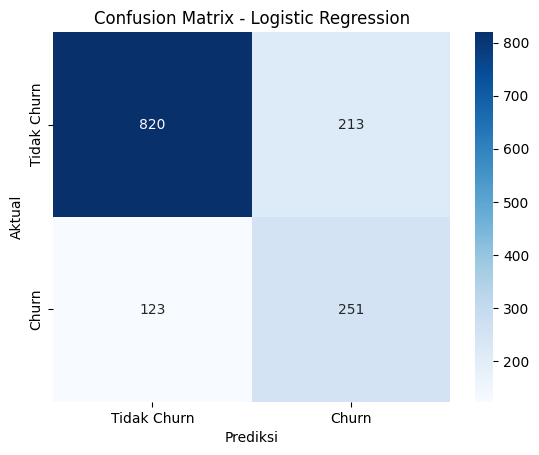


--- Melatih Model: Random Forest ---
Accuracy: 0.7775
Precision: 0.5784
Recall: 0.6016
F1-Score: 0.5898
ROC-AUC: 0.8120

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407


Confusion Matrix:


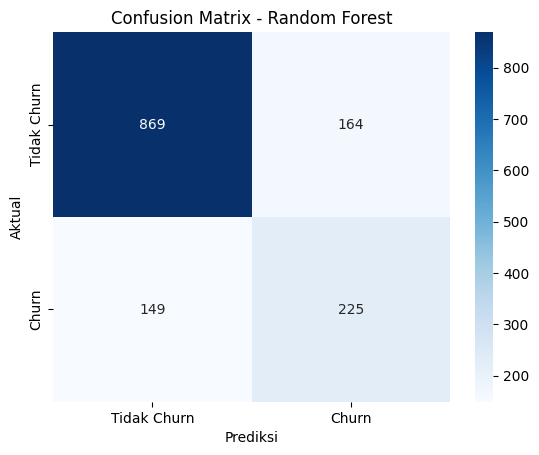


--- Melatih Model: XGBoost ---
Accuracy: 0.7633
Precision: 0.5514
Recall: 0.5882
F1-Score: 0.5692
ROC-AUC: 0.8099

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.55      0.59      0.57       374

    accuracy                           0.76      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.76      0.77      1407


Confusion Matrix:


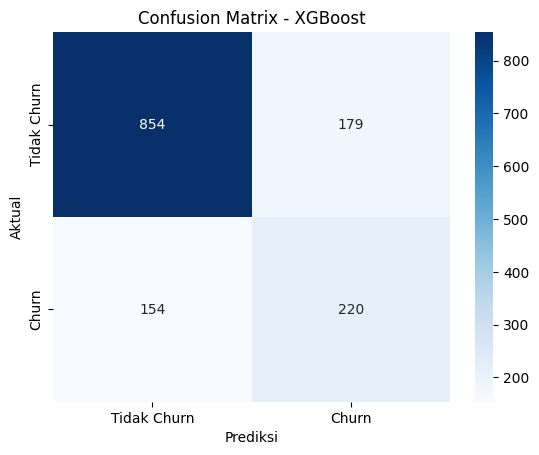


--- Ringkasan Hasil Performa Model ---
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.761194   0.540948  0.671123  0.599045  0.823042
Random Forest        0.777541   0.578406  0.601604  0.589777  0.811967
XGBoost              0.763326   0.551378  0.588235  0.569211  0.809929


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import warnings

warnings.filterwarnings('ignore')

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Latih dan evaluasi model
results = {}
for name, model in models.items():
    print(f"\n--- Melatih Model: {name} ---")

    # Latih model menggunakan data training yang sudah di-resample
    model.fit(X_train_resampled, y_train_resampled)

    # Prediksi pada test set (data asli, bukan yang di-resample)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilitas kelas positif

    # Evaluasi performa
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=['Tidak Churn', 'Churn'], yticklabels=['Tidak Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

# Tampilkan ringkasan hasil
print("\n--- Ringkasan Hasil Performa Model ---")
results_df = pd.DataFrame(results).T
print(results_df)


--- Fitur Paling Berpengaruh pada Churn (Logistic Regression) ---
                                  Feature  Coefficient  Abs_Coefficient
5                            PhoneService    -3.517589         3.517589
11            InternetService_Fiber optic    -2.382098         2.382098
26                      Contract_Two year    -1.943919         1.943919
14                     OnlineSecurity_Yes    -1.475263         1.475263
20                        TechSupport_Yes    -1.352486         1.352486
16                       OnlineBackup_Yes    -1.202261         1.202261
25                      Contract_One year    -1.190517         1.190517
24                    StreamingMovies_Yes    -1.172362         1.172362
22                        StreamingTV_Yes    -1.142889         1.142889
27  PaymentMethod_Credit card (automatic)    -0.969684         0.969684
29             PaymentMethod_Mailed check    -0.927260         0.927260
18                   DeviceProtection_Yes    -0.896290         0.8962

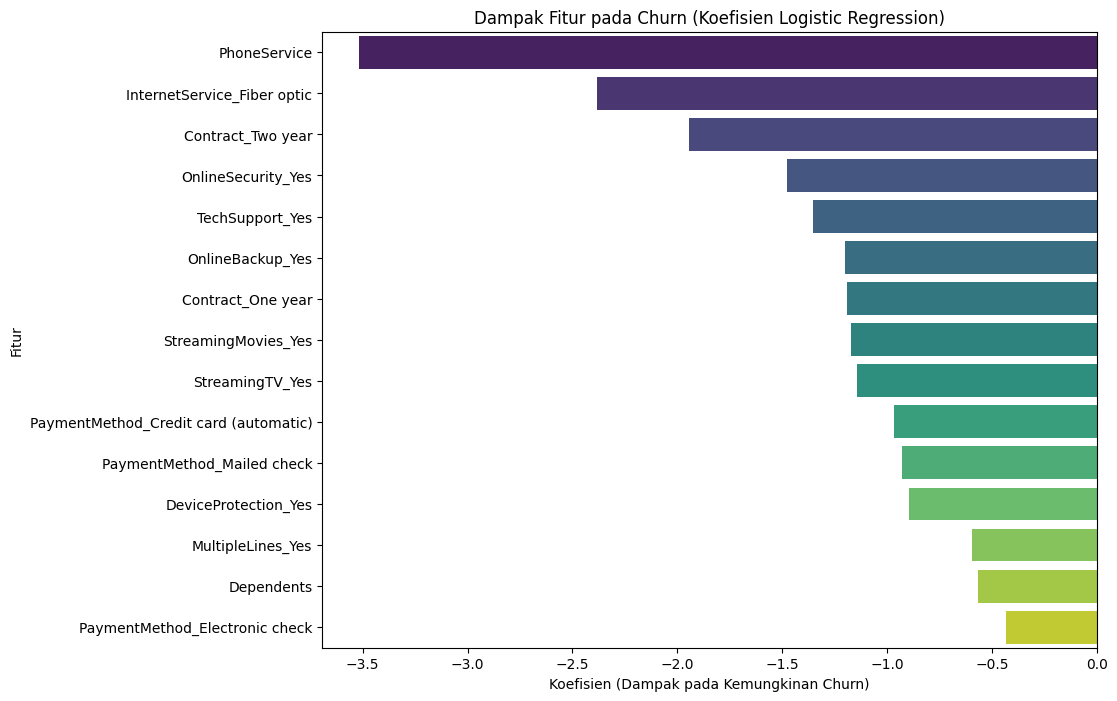

In [23]:
# Analisis Koefisien Logistic Regression untuk interpretasi fitur
model_lr = models['Logistic Regression']
feature_names = X_train_resampled.columns
coefficients = model_lr.coef_[0]
feature_importance_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_lr['Abs_Coefficient'] = abs(feature_importance_lr['Coefficient'])
feature_importance_lr = feature_importance_lr.sort_values(by='Abs_Coefficient', ascending=False)

print("\n--- Fitur Paling Berpengaruh pada Churn (Logistic Regression) ---")
print(feature_importance_lr.head(15))

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr.head(15), palette='viridis')
plt.title('Dampak Fitur pada Churn (Koefisien Logistic Regression)')
plt.xlabel('Koefisien (Dampak pada Kemungkinan Churn)')
plt.ylabel('Fitur')
plt.show()

In [26]:
!pip freeze > requirements.txt